<a href="https://colab.research.google.com/github/AdithyaDVarma/Salary-Prediction_Semester1/blob/main/Salary_Prediction_AIE_B_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the necessary modules and packages
import os
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import linear_model 
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**DATA HANDLING**

In [ ]:
# Creating the YearsExperience vs Salary data using csv
import csv
f=open("Salary.csv","w")
w=csv.writer(f)
w.writerow(["YearsExperience","Salary"])
w.writerow([1.1,40343.00])
w.writerow([1.3,43205.00])
w.writerow([1.6,46006.00])
w.writerow([2.1,55661.00])
w.writerow([2.4,52117.00])
w.writerow([2.6,58445.00])
w.writerow([2.9,60000.00])
w.writerow([3.1,59205.00])
w.writerow([3.3,61605.00])
w.writerow([3.6,63295.00])
w.writerow([3.9,64005.00])
w.writerow([4.1,64905.00])
w.writerow([4.5,65205.00])
w.writerow([4.9,66700.00])
w.writerow([5.3,69905.00])
w.writerow([5.8,70205.00])
w.writerow([6.0,71060.00])
w.writerow([6.5,71885.00])
w.writerow([6.8,72300.00])
w.writerow([7.2,73205.00])
w.writerow([7.7,80000.00])
w.writerow([8.0,80995.00])
w.writerow([8.5,82005.00])
w.writerow([8.8,83105.00])
w.writerow([9.1,85205.00])
w.writerow([9.3,87005.00])
w.writerow([9.7,89205.00])
w.writerow([10.0,91205.00])
w.writerow([10.2,95405.00])
w.writerow([10.6,98785.00])
f.close()

In [ ]:
# Printing the csv values for verification
import csv
f=open("Salary.csv","r")
w=csv.reader(f)
for x in w:
  print(x)
f.close()

['YearsExperience', 'Salary']
['1.1', '40343.0']
['1.3', '43205.0']
['1.6', '46006.0']
['2.1', '55661.0']
['2.4', '52117.0']
['2.6', '58445.0']
['2.9', '60000.0']
['3.1', '59205.0']
['3.3', '61605.0']
['3.6', '63295.0']
['3.9', '64005.0']
['4.1', '64905.0']
['4.5', '65205.0']
['4.9', '66700.0']
['5.3', '69905.0']
['5.8', '70205.0']
['6.0', '71060.0']
['6.5', '71885.0']
['6.8', '72300.0']
['7.2', '73205.0']
['7.7', '80000.0']
['8.0', '80995.0']
['8.5', '82005.0']
['8.8', '83105.0']
['9.1', '85205.0']
['9.3', '87005.0']
['9.7', '89205.0']
['10.0', '91205.0']
['10.2', '95405.0']
['10.6', '98785.0']


In [ ]:
# Initializing a data object using pandas
data = pd.read_csv("Salary.csv") 

#The head() function is used to get the first few rows
data.head()

,YearsExperience,Salary
0,1.1,40343.0
1,1.3,43205.0
2,1.6,46006.0
3,2.1,55661.0
4,2.4,52117.0


In [ ]:
# Using the data object  to find some general values like mean, minimum etc
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.696667,70072.400000
std,2.981608,15119.768479
min,1.100000,40343.000000
25%,3.150000,60401.250000
50%,5.550000,70055.000000
75%,8.375000,81752.500000
max,10.600000,98785.000000


In [ ]:
# corr() is used to find the pairwise correlation of all columns in the data we provided.
# The closer its value is to 1, the more variability the model explains.
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.980472
Salary,0.980472,1.000000


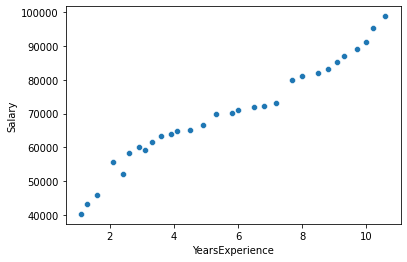

In [ ]:
# We are using seaborn, which is used to display mathematical scatter plot of the given data  
sns.scatterplot(data=data, x="YearsExperience",y="Salary")

DATA ANALYSIS

In [ ]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(data[["YearsExperience"]],data[["Salary"]])
# Using the predict method
result=lm.predict (data[["YearsExperience"]])

In [ ]:
# Creating a new column to place contents of the result variable
data["Predicted Salary Using Sklearn method"]= result
data.head()

,YearsExperience,Salary,Predicted Salary Using Sklearn method
0,1.1,40343.0,47217.845056
1,1.3,43205.0,48212.241936
2,1.6,46006.0,49703.837255
3,2.1,55661.0,52189.829453
4,2.4,52117.0,53681.424772


In [ ]:
# Created a new column to show the error current salary minus predicted salary
data["Prediction Error Using Sklearn method"] = data["Salary"]-data["Predicted Salary Using Sklearn method"]
data.head()

,YearsExperience,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,1.1,40343.0,47217.845056,-6874.845056
1,1.3,43205.0,48212.241936,-5007.241936
2,1.6,46006.0,49703.837255,-3697.837255
3,2.1,55661.0,52189.829453,3471.170547
4,2.4,52117.0,53681.424772,-1564.424772


Text(0.5, 1.0, 'Linear Regression: Years of Experience vS Corresponding Salary ')

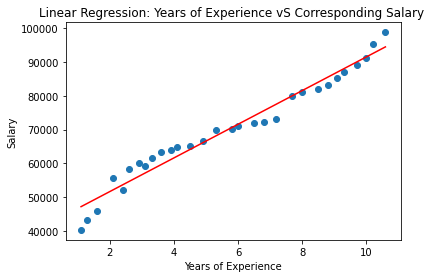

In [ ]:
# Plotting Linear Regression graph with Sklearn  
plt.scatter(data["YearsExperience"], data["Salary"])
plt.plot(data["YearsExperience"],data["Predicted Salary Using Sklearn method"], color="red")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience vS Corresponding Salary ")

In [ ]:
# this command is used to find the slope(m) of the graph
lm.coef_

array([[4971.98439676]])

In [ ]:
# this command is used to find the y-intercept(c) of the graph
lm.intercept_

array([41748.6622198])

In [ ]:
#y = wo + w1*x
#Salary = 41748.6622198 + 4971.98439676 * YearsExperience 

**We are using both predict method and the y=mx+c method to find predicted salary to make sure that both values are equal** 

In [ ]:
#Testing for 7 years of experience
Salary = 41748.6622198 + 4971.98439676 * 7
Salary

76552.55299711999

In [ ]:
lm.predict([[7]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[76552.55299711]])

**Linear Regression using Statsmodels**

In [ ]:
# OLS (ordinary list squares) is common technique 
# for estimating coefficients of linear regression equations which describe the relationship between one or more independent variables and a dependent variable
# Here our project the independent variable is YearsExperience and dependent variable is Salary


#fit method will adjust the model according to the data hence better accuracy
lm_version2 = smf.ols(formula = " Salary ~ YearsExperience",data=data).fit() 
lm_version2.predict() 

# Storing the prediction values above
Predictions=lm_version2.predict()

In [ ]:
#The head() function is used to get the first few rows
data.head()

,YearsExperience,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,1.1,40343.0,47217.845056,-6874.845056
1,1.3,43205.0,48212.241936,-5007.241936
2,1.6,46006.0,49703.837255,-3697.837255
3,2.1,55661.0,52189.829453,3471.170547
4,2.4,52117.0,53681.424772,-1564.424772


In [ ]:
# Prediction column has been made
data["Predicted Salary Using Statsmodels method"]=Predictions
data.head()

,YearsExperience,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method,Predicted Salary Using Statsmodels method
0,1.1,40343.0,47217.845056,-6874.845056,47217.845056
1,1.3,43205.0,48212.241936,-5007.241936,48212.241936
2,1.6,46006.0,49703.837255,-3697.837255,49703.837255
3,2.1,55661.0,52189.829453,3471.170547,52189.829453
4,2.4,52117.0,53681.424772,-1564.424772,53681.424772


In [ ]:
# Creating the column
data["Prediction Error Using Statsmodels method"] = data["Salary"] - data["Predicted Salary Using Statsmodels method"]
data.head()

,YearsExperience,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method,Predicted Salary Using Statsmodels method,Prediction Error Using Statsmodels method
0,1.1,40343.0,47217.845056,-6874.845056,47217.845056,-6874.845056
1,1.3,43205.0,48212.241936,-5007.241936,48212.241936,-5007.241936
2,1.6,46006.0,49703.837255,-3697.837255,49703.837255,-3697.837255
3,2.1,55661.0,52189.829453,3471.170547,52189.829453,3471.170547
4,2.4,52117.0,53681.424772,-1564.424772,53681.424772,-1564.424772


Text(0.5, 1.0, 'Linear Regression: Years of Experience vS Corresponding Salary ')

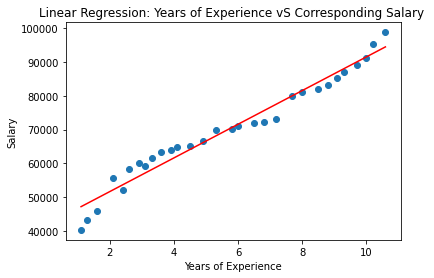

In [ ]:
# Plotting Linear Regression graph with Statsmodels 
plt.scatter(data["YearsExperience"], data["Salary"])
plt.plot(data["YearsExperience"],data["Predicted Salary Using Statsmodels method"], color="red")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience vS Corresponding Salary ")

**Linear Regression with regplot**

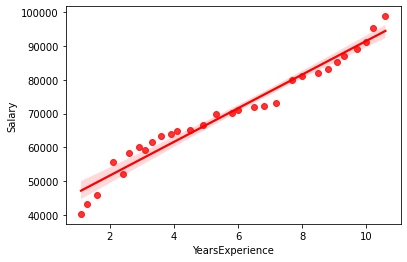

In [ ]:
# Using seaborn,plot data and a linear regression model fit and show the margin of error

sns.regplot(x=data["YearsExperience"],y=data["Salary"],color="red")